In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.12.0


In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
network=models.Sequential() #Sequential model ma aik layer ky uper dusra layer stack hota ha

In [ ]:
# here input layer=784(28*28) 
# middle/hidden layer=512
#output layer=10
#Activation function that transform linearity into non-linearity
network.add(layers.Dense(512,activation="relu",input_shape=(784,))) 
network.add(layers.Dense(10,activation="softmax"))

In [ ]:
num_parameter=(784*512)+512
print("paramsss=",num_parameter)
network.summary()

paramsss= 401920
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In deep learning, "param" typically refers to the number of parameters (weights and biases) in a given layer of a neural network.

Each neuron in a layer is connected to all neurons in the previous layer, and each connection has a weight. Therefore, the number of weights in a layer is equal to the number of neurons in the current layer multiplied by the number of neurons in the previous layer. For example, if a layer has 256 neurons and the previous layer has 128 neurons, then there are 256*128 = 32,768 weights in that layer.

Additionally, each neuron in a layer also has a bias term, which is a constant value added to the weighted sum of inputs to the neuron. Therefore, the number of biases in a layer is equal to the number of neurons in that layer. For example, if a layer has 256 neurons, then there are 256 biases in that layer.

The total number of parameters in a layer is the sum of the number of weights and the number of biases. In the example above, the first dense layer has 401920 parameters because it has 784*512 (weights from 784 input neurons) + 256 (biases) = 401920 parameters.

So when you see the term "params" in the output of a neural network model summary, it typically refers to the number of learnable parameters (weights and biases) in each layer of the network. The number of parameters in a layer can affect the size and complexity of the model, and thus its performance and training time. In general, having too few parameters may result in underfitting, while having too many parameters may result in overfitting.


In [ ]:
#densely connected mean every neuron is conncected to every other neuron
#10 classes(1-10)is liye last layer ma 10 rakha
#softmax ===>10 probabality score generate kary ga jin ka sum 1 hoga.aor jis probablity ki valur zyda hogi wo (1-10 digits) ma sy hoga
			#returns the probability scores of each class.
#multiclassification ky lia "Softmax" ka use 




In [ ]:
#ANN---Artificial Neural Network--->>> images,numbers,videos,voices,text etc
#CNN--- Convutional Neural Network---->>.IMages
#RNN----->>>Text
# GAN---> Genration  

- Optimizer is an algorithm used to update the weights and biases of a neural network during the training process. The goal of optimization is to minimize a loss function, which measures the difference between the predicted outputs of the network and the true labels.

- for binary classification:
		* we use binaray_crossentropy
- for multiclass (like we have 10 classes(1-10):
		* we use categorical_crossentropy

In [ ]:
 network.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])
 #if we use loss=sparse_categorical_crossentropy then we don't need to one hot encoding

In [ ]:
##Preprocessing
train_images.shape

(60000, 28, 28)

In [ ]:
##Preprocessing Converting 3dimensional in to vector 
train_images=train_images.reshape((60000,28*28)) #Vector data(samples,features)
train_images=train_images.astype('float')/255  #Scaling down the image in range (0-1)

In [ ]:
test_images=test_images.reshape((10000,28*28)) #converting 28*28 into like this [1,2,3.....784]
test_images=test_images.astype('float')/255

In [ ]:
#Labels must be converted into category
#while features must be in numerical values

In [ ]:
 #if we use loss=sparse_categorical_crossentropy in above steps then we don't need to one hot encoding
#converting labels into Categorical(One Hot Encoding) as we have ten class/category here(1-10)
#Number b reahy aor category b bn jye
from tensorflow.keras.utils import to_categorical #(sckitllearn--->onehotencoder , Pandas--->pd.get_dummies)
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

#an epoch is one iteration of the training process where the model has seen the entire dataset once.5 iteration where every time model has seen the entire dataset
#The batch size refers to the number of samples that are processed by the model in one forward/backward pass.
#To break it down further, if the training dataset contains 1000 samples, 
	#there will be 8 batches of 128 samples each and 1 batch of 40 samples in the last epoch.
    #The model will be trained on each batch for one forward and backward pass, and 
    #the weights will be updated based on the errors made on that batch. 
    #After training on all batches in an epoch, the weights will be updated and the process will be repeated for 
    #the next epoch until 5 epochs have been completed.
    #his process will be repeated for 5 epochs, which means that the model will 
    #see the entire training dataset 5 times during the training process.
 #batch_size also relates to timing to take the fitting process.
 #Epochs relates ---> Overfitting, underfitting and Generalization
       # -unncessary increase in epoch make the model Overfitting because of memorization

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.2675 - accuracy: 0.9232
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.1070 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0710 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0512 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0388 - accuracy: 0.9880


In [ ]:
test_loss,test_acc= network.evaluate(test_images, test_labels)
print("test_acc:",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0659 - accuracy: 0.9804
test_acc: 0.980400025844574


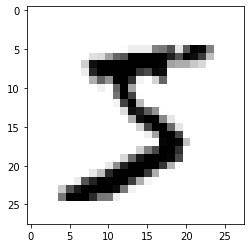

In [ ]:
digit=train_images[0].reshape(28,28)*255 #converting again into 2D  
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [ ]:
from PIL import image
img=Image.open("OIP.jpg").convert('L') #open image and converting into grayscale
img.save('pil-greyscale.png') #saving image

ImportError: ignored

In [ ]:
   #OR# another method to open and save the image
from skimage import color
form skimage import io
read_image=io.imread("OIP.jpg") #opening image
img=color.rgb2gray(read_image)  #converting image
io.imsave("pil-grayscale2.png",img) #saving image in var img

SyntaxError: ignored

In [ ]:
   ###OR#### Another way to load image
from tensorflow.keras.preprocessing import image

In [ ]:
##loading the image and croping the image in the size 28,28 
img=image.load_img("pil-greyscale2.png",target_size=(128,128))

FileNotFoundError: ignored

In [ ]:
img

NameError: ignored

In [ ]:
x=image.img_to_array(img)

NameError: ignored

In [ ]:
x.resize(128,128,refcheck=False)

NameError: ignored

In [ ]:
x.shape()

NameError: ignored

In [ ]:
plt.imshow(x,cmap=plt.cm.binary)
plt.show()

NameError: ignored

In [ ]:
#step 1:
#using tensorflow to load image

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img=image.load_img("image6.png",target_size=(28,28),grayscale=True, color_mode="grayscale")
## target_size===> so that the image should be load in 28x28 pixel

In [ ]:
img

In [ ]:
 #step 2:
 #converting image into array
 img_arr=image.img_to_array(img)


In [ ]:
img_arr

array([[[255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.]],

       [[255.],
        [249.],
        [ 94.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [221.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
    

In [ ]:
img_arr.shape

(28, 28, 1)

In [ ]:
type(img_arr)

numpy.ndarray

In [ ]:
img_arr=img_arr.reshape(28,28)

In [ ]:
img_arr.shape

(28, 28)

In [ ]:
img_arr=img_arr.reshape(784)

In [ ]:
img_arr.shape

(784,)

In [ ]:
#Now Predicting using the above trained model named "network"

In [ ]:
network.predict(img_arr.reshape(1,784))

1/1 [==============================] - 0s 82ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
probs=network.predict(img_arr.reshape(1,784))

1/1 [==============================] - 0s 23ms/step


In [ ]:
probs.argmax()

5

In [ ]:
 #Saving the Model

In [ ]:
network.save("handwrittendigitclassifier.sav")    

In [ ]:
#loading the model

In [ ]:
import keras

In [ ]:
model=keras.models.load_model("handwrittendigitclassifier.sav")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict(img_arr.reshape(1,784))

1/1 [==============================] - 0s 54ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)